In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from lane_detection import LaneDetection

filenames = [os.path.join('./test_images', filename) 
             for filename in os.listdir('./test_images') if not filename.startswith('.')]

ld = LaneDetection()

## Finding Bottom Most Center of Left / Right

./test_images/straight_lines2.jpg
left: 228 right 1090


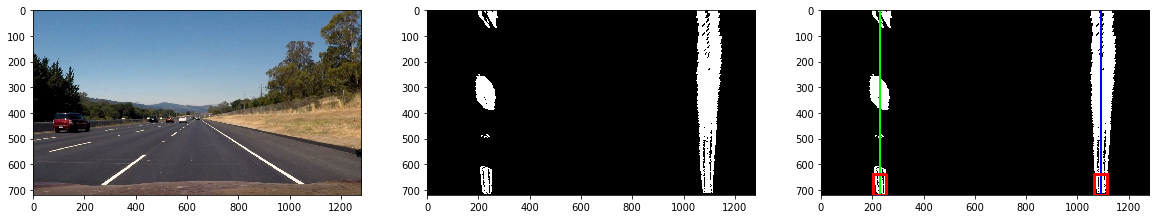

In [2]:
filename = filenames[1]
print(filename)
img = mpimg.imread(filename)

lane_algo = LaneDetection()
binary_warped = lane_algo.get_warped_image(img)
l_center, r_center = lane_algo.find_bottom_left_right()

print('left:', l_center, 'right', r_center)

# show left_center, midpoint and right_center on an image
output_img = np.dstack((binary_warped * 255, binary_warped * 255, binary_warped * 255))

cv2.line(output_img, (l_center, 0), (l_center, output_img.shape[1]), (0,255,0), 5)
cv2.line(output_img, (r_center, 0), (r_center, output_img.shape[1]), (0,0,255), 5)
cv2.rectangle(output_img, \
              (l_center - lane_algo.window_width // 2, binary_warped.shape[0] - lane_algo.window_height), \
              (l_center + lane_algo.window_width // 2, binary_warped.shape[0]), \
              (255, 0, 0), 10)
cv2.rectangle(output_img, \
              (r_center - lane_algo.window_width // 2, binary_warped.shape[0] - lane_algo.window_height), \
              (r_center + lane_algo.window_width // 2, binary_warped.shape[0]), \
              (255, 0, 0), 10)
    
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))
ax1.imshow(img)
ax2.imshow(binary_warped, cmap='gray')
ax3.imshow(output_img)
plt.show()

## Find left and right sub windows for possible lane line

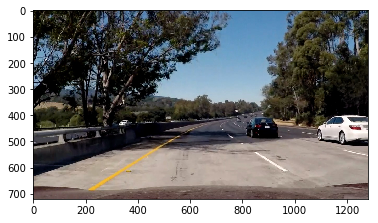

Filled in area is less than the last. Diff Ratio 0.16
Filled in area is less than the last. Diff Ratio 0.22


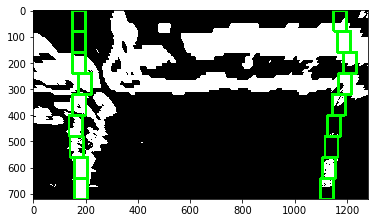

In [3]:
from lane_detection import LaneDetection
from lane import Lane, LeftLane, RightLane

filename = './test_images/test5.jpg'
img = mpimg.imread(filename)

plt.imshow(img)
plt.show()

lane_algo = LaneDetection()
binary_warped = lane_algo.get_warped_image(img)
ll = LeftLane(binary_warped)
rr = RightLane(binary_warped)

output_img = np.dstack((binary_warped * 255, binary_warped * 255, binary_warped * 255))

# def find_window_centers(lane):
#     boxes_y = np.arange(0, lane.binary_warped.shape[0], lane.window_height)[::-1]
#     centers = np.zeros_like(boxes_y)
#     conv_max = np.zeros_like(boxes_y)
#     conv = np.zeros((len(boxes_y), lane.margin))

#     # set first center to the last one as the loop uses last center
#     centers[-1] = lane.identify_lane_start()
    
#     window_for_conv = np.ones(lane.window_width)

#     for i in range(0, len(boxes_y)):
#         y = boxes_y[i]
#         print("y", y, "i", i)

#         margin_lx = max(centers[i - 1] - lane.margin // 2, 0)
#         margin_rx = min(centers[i - 1] + lane.margin // 2, lane.binary_warped.shape[1])

#         lt = margin_lx, y
#         rb = margin_rx, y + lane.window_height

#         image_area = lane.binary_warped[y: y + lane.window_height, margin_lx : margin_rx]

#         sum_cols = np.sum(image_area, axis=0)
#         conv[i] = np.convolve(window_for_conv, sum_cols, 'same')
#         conv_max[i] = np.argmax(conv[i])
        
#         cv2.rectangle(output_img, lt, rb, (0, 255, 0), 10)

#         # it could be that there are no pixles in the given window at all
#         if conv[i,conv_max[i]] == 0:
#             centers[i] = centers[i - 1]
#             conv_max[i] = conv_max[i - 1]
#             conv[i] = conv[i-1]
            
#             cv2.line(output_img, (centers[i], y),  (centers[i], y + lane.window_height), (255,0,0), 10)
#         else:
#             centers[i] = conv_max[i] + margin_lx
        
#             cv2.line(output_img, (centers[i], y),  (centers[i], y + lane.window_height), (255,0,0), 10)
            
#             plt.imshow(output_img)
#             plt.show()

#             # how many pixels were there in this box compared to the previous one
#             # if not many then don't believe so much on this box

#             if i > 0:
#                 filled_previous = np.sum(conv[i - 1]) + 1e-4
#                 filled_area = np.sum(conv[i])
#                 filled_area_ratio = abs(filled_area / filled_previous)

#                 print('Y,i:', y, i, 'filled', filled_area, 'previous', filled_previous, 'ratio', filled_area_ratio)

#                 if filled_area_ratio < 0.3:
#                     center_diff = (centers[i] - centers[i-1]) / lane.window_width
#                     print('Filled in area is less than the last. Diff Ratio', center_diff)

#                     # a maximum of 30% change in center is allowed in case
#                     # not many pixels are found in this window
                    
#                     if abs(center_diff) > 0.3:
#                         print('Changing center', centers[i])
#                         if centers[i] < centers[i-1]:
#                             centers[i] = centers[i-1] * 0.7
#                         else:
#                             centers[i] = centers[i-1] * 1.3
#                         print('New center', centers[i])

#                     # carry forward 80% weight of the previous conv_max as we go up we don't want
#                     # one or two pixels in this window to allow another small ratio of pixels to be impacted
#                     print(conv[i].shape)
#                     conv[i] = conv[i-1] * 0.8
#                     print(conv[i].shape)

#     return centers

centers = ll.get_windows_from_centers()
for center in centers:
    cv2.rectangle(output_img, center[0], center[1], (0, 255, 0), 10)

centers = rr.get_windows_from_centers()
for center in centers:
    cv2.rectangle(output_img, center[0], center[1], (0, 255, 0), 10)

#find_window_centers(rr)

plt.imshow(output_img)
plt.show()

## Polyfit

Filled in area is less than the last. Diff Ratio 0.16
Filled in area is less than the last. Diff Ratio 0.22


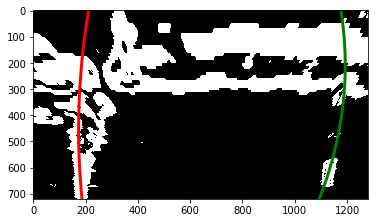

In [4]:
from lane import Lane, LeftLane, RightLane
from lane_detection import LaneDetection

filename = './test_images/test5.jpg'
img = mpimg.imread(filename)

lane_algo = LaneDetection()
binary_warped = lane_algo.get_warped_image(img)

ll = LeftLane(binary_warped)
poly_left = ll.fit_poly()

rr = RightLane(binary_warped)
poly_right = rr.fit_poly()

y = np.arange(0, binary_warped.shape[0])
ll_fit = poly_left[0] * y ** 2 + poly_left[1] * y + poly_left[2]
rr_fit = poly_right[0] * y ** 2 + poly_right[1] * y + poly_right[2]

plt.imshow(binary_warped, cmap='gray')
plt.plot(ll_fit, y, color='red', linewidth=3)
plt.plot(rr_fit, y, color='green', linewidth=3)
plt.show()

## Speed test between zero overall and only wihtin the window

Filled in area is less than the last. Diff Ratio -0.1
[210 211 212 ..., 264 265 266] [640 640 640 ...,  68  68  68]


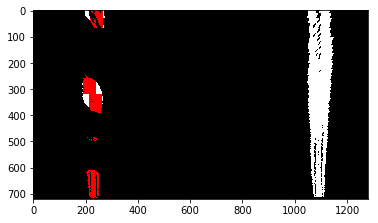

In [5]:
from lane import Lane, LeftLane, RightLane
from lane_detection import LaneDetection

filename = './test_images/straight_lines2.jpg'
img = mpimg.imread(filename)

lane_algo = LaneDetection()
binary_warped = lane_algo.get_warped_image(img)

ll = LeftLane(binary_warped)
boxes = ll.get_windows_from_centers()

def full_nz():
    nonzero = binary_warped.nonzero()
    nonzeroy = nonzero[0]
    nonzerox = nonzero[1]

    lt = (200,200)
    rb = (400,400)

    good_indices_tf = (nonzeroy >= lt[1]) & (nonzeroy <= rb[1]) & (nonzerox >= lt[0]) & (nonzerox <= rb[0])
    good_indices = good_indices_tf.nonzero()[0]

    fitx = nonzerox[good_indices]
    fity = nonzeroy[good_indices]

    output_img = np.dstack((binary_warped * 255, binary_warped * 255, binary_warped * 255))
    output_img[fity, fitx] = [255,0,0]
    
    return output_img

def small_nz():
    lt = (200,200)
    rb = (400,400)

    image_area = binary_warped[lt[1]:rb[1], lt[0]:rb[0]]
    
    nonzero = image_area.nonzero()
    nonzeroy = nonzero[0] + lt[1]
    nonzerox = nonzero[1] + lt[0]
    
    output_img = np.dstack((binary_warped * 255, binary_warped * 255, binary_warped * 255))
    output_img[nonzeroy, nonzerox] = [255,0,0]
    
    return output_img

chosen_x, chosen_y = ll.choose_window_pixels()
print(chosen_x, chosen_y)

output_img = np.dstack((binary_warped * 255, binary_warped * 255, binary_warped * 255))
output_img[chosen_y, chosen_x] = [255,0,0]

# output_img = small_nz()
# output_img2 = full_nz()

#f, (ax1, ax2) = plt.subplots(1,2,figsize=(20,5))
#ax1.imshow(output_img)
#ax2.imshow(output_img2)

plt.imshow(output_img)
plt.show()

## Visualizing Lanes

Filled in area is less than the last. Diff Ratio -0.1


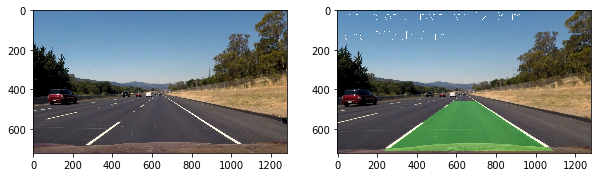

In [6]:
filename = './test_images/straight_lines2.jpg'
img = mpimg.imread(filename)

lane_algo = LaneDetection()
lanes = lane_algo.process_image(img)

# img = lane_algo.undistort(img)
# binary_warped = lane_algo.get_warped_image(img)

# ll = LeftLane(binary_warped)
# ll.fit_poly()

# rr = RightLane(binary_warped)
# rr.fit_poly()

# blank_image = np.zeros_like(binary_warped)
# lane_image = np.dstack((blank_image, blank_image, blank_image))

# # ll_fit = np.array([30,40,50])
# # rr_fit = np.array([30,40,50])
# # y = np.array([0,1,2])

# pts_left = np.dstack((ll.current_fitx, ll.current_fity))
# pts_right = np.dstack((rr.current_fitx[::-1], rr.current_fity[::-1]))
# pts = np.hstack((pts_left, pts_right))

# cv2.fillPoly(lane_image, np.int_(pts), (0, 255, 0))

# unwarped_img = lane_algo.get_unwarped_img(lane_image)
# result = cv2.addWeighted(img, 1, unwarped_img, 0.3, 0)

# #cv2.add_weighted(img, 1,lane_image, 0.2, )
f, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.imshow(img)
ax2.imshow(lanes)
plt.show()

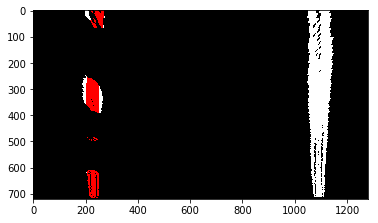

In [52]:
binary_warped = np.copy(lane_algo.binary_warped)

def fit_again(fit):
    nonzero = binary_warped.nonzero()
    nonzeroy = nonzero[0]
    nonzerox = nonzero[1]

    margin = 25

    center = np.polyval(fit, nonzeroy)

    lane_inds = (nonzerox > (center - margin)) & (nonzerox < (center + margin))

    chosen_x = nonzerox[lane_inds]
    chosen_y = nonzeroy[lane_inds]
    
    return chosen_x, chosen_y

chosen_x, chosen_y = fit_again(ll.current_fit)

color = np.dstack((binary_warped * 255, binary_warped * 255, binary_warped * 255))
color[chosen_y, chosen_x] = [255, 0, 0]

plt.imshow(color)
plt.show()

# Fit a second order polynomial to each
#left_fit = np.polyfit(chosen_y, chosen_x, 2)
#print(left_fit, ll.current_fit)

In [58]:
y = np.arange(0, 720)
x = np.ones(720) * 50

fit = np.polyfit(y, x, 2)
print(fit)

fit2 = np.polyfit(y, x + 100, 2)
print(fit2)

print(fit2 - fit)

[  5.99372197e-20  -1.22435108e-16   5.00000000e+01]
[  2.39748879e-19  -4.08117025e-17   1.50000000e+02]
[  1.79811659e-19   8.16234051e-17   1.00000000e+02]
